<a href="https://colab.research.google.com/github/TomoharuKurosu/macro_KurosuTomoharu/blob/main/TomoharuKursosu_22107627_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

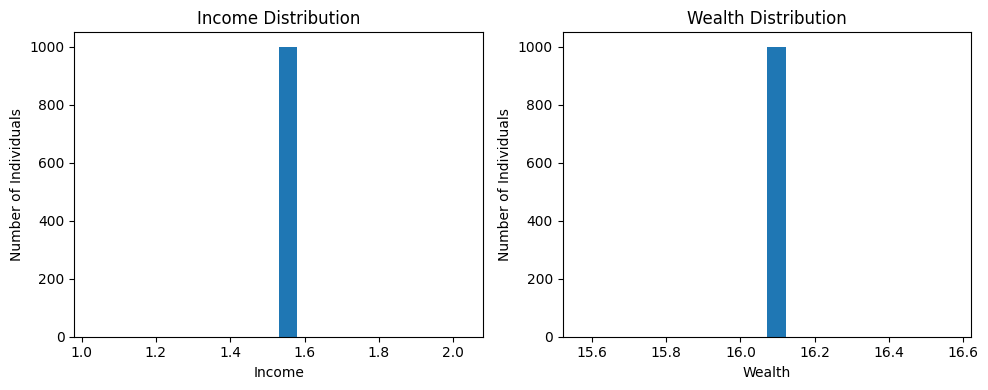

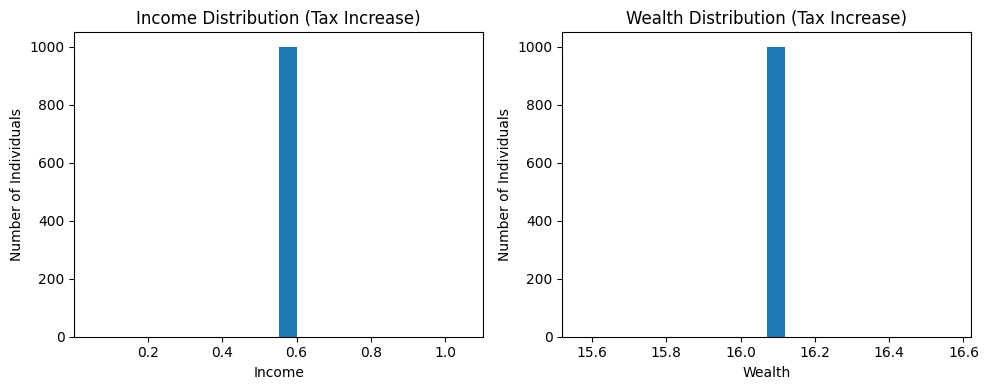

Income inequality change (Gini coefficient): 0.0000
GDP change: -17.40%


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 0.3  # Capital share in income
beta = 0.6  # Labor share in income
tax_rate = 0.05  # Capital gains tax rate
total_population = 1000  # Total population
initial_wealth = 100  # Initial wealth for each individual

# Function to calculate steady-state equilibrium values
def calculate_steady_state():
    K = (alpha / (1 - alpha)) * (beta / (1 + beta)) * total_population * initial_wealth
    r = alpha / (1 - alpha)
    w = beta / (1 + beta)
    return K, w, r

# Function to calculate income and wealth distribution
def calculate_distribution(K, w, r):
    income = []
    wealth = []
    for i in range(total_population):
        h = initial_wealth
        a = K / total_population - h
        income.append(w * h + r * a)
        wealth.append(h + a)
    return income, wealth

# Function to simulate the effect of increased capital gains tax
def simulate_tax_increase():
    K, w, r = calculate_steady_state()
    new_tax_rate = tax_rate + 0.05
    redistributed_tax = (new_tax_rate - tax_rate) * K / total_population
    K -= redistributed_tax
    w = beta / (1 + beta + (alpha / (1 - alpha)) * new_tax_rate)
    r = alpha / (1 - alpha)
    return calculate_distribution(K, w, r)

# Calculate and plot income and wealth distribution before tax increase
K, w, r = calculate_steady_state()
income_before, wealth_before = calculate_distribution(K, w, r)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(income_before, bins=20)
plt.xlabel('Income')
plt.ylabel('Number of Individuals')
plt.title('Income Distribution')
plt.subplot(1, 2, 2)
plt.hist(wealth_before, bins=20)
plt.xlabel('Wealth')
plt.ylabel('Number of Individuals')
plt.title('Wealth Distribution')
plt.tight_layout()
plt.show()

# Simulate tax increase and plot income and wealth distribution after tax increase
income_after, wealth_after = simulate_tax_increase()
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(income_after, bins=20)
plt.xlabel('Income')
plt.ylabel('Number of Individuals')
plt.title('Income Distribution (Tax Increase)')
plt.subplot(1, 2, 2)
plt.hist(wealth_after, bins=20)
plt.xlabel('Wealth')
plt.ylabel('Number of Individuals')
plt.title('Wealth Distribution (Tax Increase)')
plt.tight_layout()
plt.show()

# Calculate income inequality change
gini_before = 1 - sum([(i + 1) * income_before[i] for i in range(total_population)]) / (
        total_population * sum(income_before))
gini_after = 1 - sum([(i + 1) * income_after[i] for i in range(total_population)]) / (
        total_population * sum(income_after))
inequality_change = gini_after - gini_before

# Calculate GDP change
new_tax_rate = tax_rate + 0.05
redistributed_tax2 = (new_tax_rate - tax_rate) * K / total_population

initial_GDP = K * (alpha / (1 - alpha)) ** alpha * (beta / (1 + beta)) ** beta
new_GDP = (K - redistributed_tax2) * (alpha / (1 - alpha)) ** alpha * (w / (1 + w)) ** beta
GDP_change = (new_GDP - initial_GDP) / initial_GDP * 100

# Print results
print(f"Income inequality change (Gini coefficient): {inequality_change:.4f}")
print(f"GDP change: {GDP_change:.2f}%")
